# Curve Fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

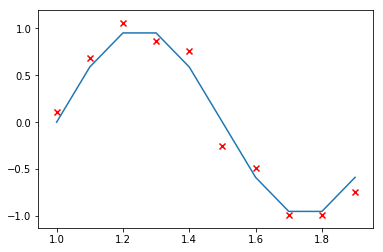

In [12]:
x = np.arange(1, 2, 0.1)
y = np.sin(2 * np.pi * x)

y_noisy = np.sin(2 * np.pi * x) + np.random.normal(scale=0.15,size=x.shape)

plt.plot(x, y)
plt.scatter(x, y_noisy, c='r', marker= 'x')

In [13]:
def eval_polynomial(x, coeffs):
    assert type(coeffs) is np.ndarray, "Type of coeffs must be an ndarray"
    x_pows = np.array([x**i for i in range(coeffs.shape[0])])
    return np.dot(x_pows, coeffs)

In [14]:
coeffs = np.array([1, 2, 1])
print("f(x) = x^2 + 2x + 1; f(2)=", eval_polynomial(2, coeffs))

f(x) = x^2 + 2x + 1; f(2)= 9


## Linear Models

Even though a polynomial is a non-linear function, the coefficients vary in a linear fashion. 

Models where the unkown parameters i.e. the coefficients are linear in nature are known as _linear models_

In [15]:
def squared_loss_error(target, predictions):
    assert type(target) is np.ndarray and type(predictions) is np.ndarray, "Both variables must be numpy arrays"
    assert target.shape == predictions.shape, "Shape mismatch of arrays"
    
    error = 0.5 * np.sum( np.square( predictions - target ) )
    
    return error

assert squared_loss_error(np.array([1, 1]), np.array([1, 1])) == 0, "error is 0 when predictions == target"
# Let's not be crazy enough to assume that the error value is exact for non-zero values; Accepted delta = 0.01
assert 1.99 < squared_loss_error(np.array([2, 0]), np.array([0, 0])) < 2.01, "Error should roughly equal 2" 

### Solving for polynomial curve fitting

In [16]:
from numpy.linalg import det

def generate_curve_fitting_polynomial(degree, x, y, debug=False):
    assert type(x) is np.ndarray and type(y) is np.ndarray, "Both x and y should be numpy arrays"
    assert x.shape == y.shape, "Shape mismatch of arrays"
    
    pow_sum = [sum([x_n**i for x_n in x]) for i in range(0, 2*degree + 1)]
    
    M = np.matrix([[pow_sum[i + j] for i in range(0, degree + 1)] for j in range(0, degree + 1)])
    
    det_M = det(M)
    
    coeffs = np.empty((degree + 1))
    b = np.array([sum([(x_n**i)*y_n for (x_n,y_n) in zip(x, y)]) for i in range(0, degree + 1)])
        
    # Calculating the coefficients according to Cramer's rule
    for i in range(0, degree + 1):
        
        M_i = np.copy(M)
        M_i[:,i] = b
        coeffs[i] = det(M_i) / det_M
        
    return coeffs


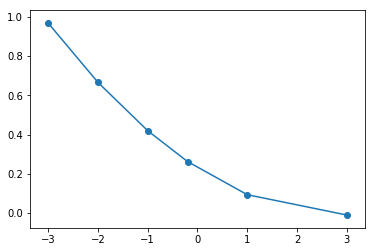

In [17]:
toy_x = np.array([-3, -2, -1, -0.2, 1, 3])
toy_y = np.array([0.9, 0.8, 0.4, 0.2, 0.1, 0])
coeffs = generate_curve_fitting_polynomial(2, toy_x, toy_y, debug=True)
toy_pred = [eval_polynomial(x_n, coeffs) for x_n in toy_x]
plt.plot(toy_x, toy_pred)
plt.scatter(toy_x, toy_pred)

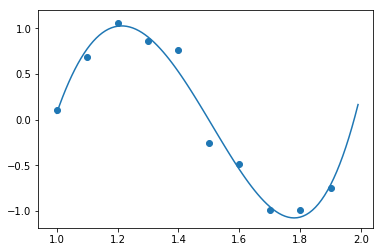

In [59]:
coeffs = generate_curve_fitting_polynomial(4, x, y_noisy)
x_curve = np.arange(1, 2, 0.01)
y_curve = [eval_polynomial(x_n, coeffs) for x_n in x_curve]
plt.plot(x_curve, y_curve)
plt.scatter(x, y_noisy)

In [60]:
from math import sqrt
def root_mean_square_error(target, predictions):
    return sqrt(2 * squared_loss_error(target, predictions) / target.shape)

error:  0.7585480910260338
error:  0.4582778709993678
error:  0.4063423347559982
error:  0.12245379455461744
error:  0.11995219750207321
error:  0.10810388304619022
error:  0.42835913880297716


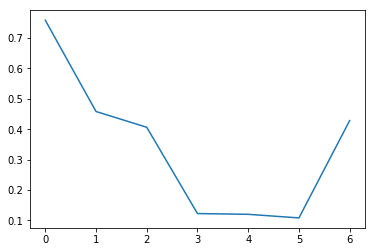

In [61]:
errors = []

n = 7
for i in range(0, n):
    coeffs = generate_curve_fitting_polynomial(i, x, y_noisy)
    y_preds = np.array([eval_polynomial(x_n, coeffs) for x_n in x])
    rms = root_mean_square_error(y_noisy, y_preds)
    print("error: ", rms)
    errors.append(rms)
    
plt.plot(range(0, n), errors)

error:  0.7585480910260338
error:  2.791005804432398
error:  0.4217962803736609
error:  46.3237049122399
error:  65.05281190828813
error:  163.49507877438214
error:  483.60475857778977


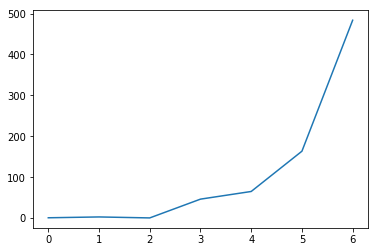

In [64]:
from numpy import polyfit

n = 7
errors = []
for i in range(0, n):
    coeffs = polyfit(x, y_noisy, i)
    y_preds = np.array([eval_polynomial(x_n, coeffs) for x_n in x])
    rms = root_mean_square_error(y_noisy, y_preds)
    print("error: ", rms)
    errors.append(rms)
    
plt.plot(range(0, n), errors)